----

# **K-Means Clustring Techniques**

## **Author**   :  **Muhammad Adil Naeem**

## **Contact**   :   **madilnaeem0@gmail.com**
<br>

----

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

### **Load the Data**

In [10]:
df = pd.read_csv('/content/Mall_customers.csv')

### **First 5 rows of dataset**

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### **Implement K-Means with 3 clusters**

- This code initializes a KMeans clustering model with the following parameters:

- `n_clusters=3`: Specifies that the algorithm should identify 3 clusters in the data.
- `init='K-means++'`: Uses the K-means++ method for initializing the cluster centroids, which helps in improving the convergence speed and the quality of the clusters.
- `random_state=42`: Sets a seed for the random number generator to ensure reproducibility of the results.

This model can then be used to fit and predict clusters on a dataset.

In [12]:
model = KMeans(n_clusters=3, init='k-means++',random_state=42)

In [13]:
y_kmeans = model.fit_predict(df.iloc[:,[3,4]].values)

In [14]:
X = df.iloc[:,[3,4]].values

## **Visualization of Customer Clusters Using K-Means Clustering**

- This code creates a scatter plot to visualize three clusters of customers based on their annual income and spending score, with distinct colors for each cluster and centroids highlighted.

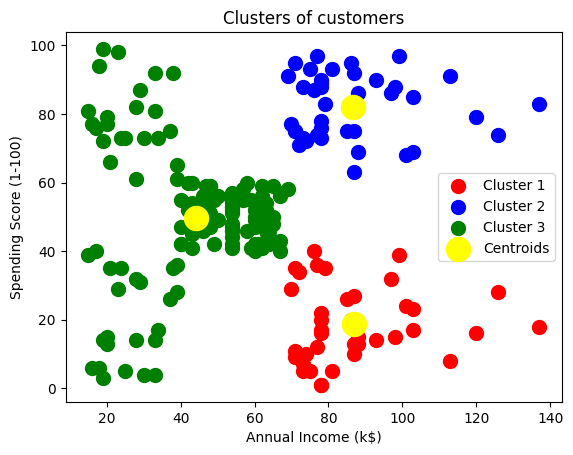

In [17]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans==0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans==1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans==2,1], s=100, c='green', label='Cluster 3')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### **Let's Get Optimal Key Value by Elbow Method**

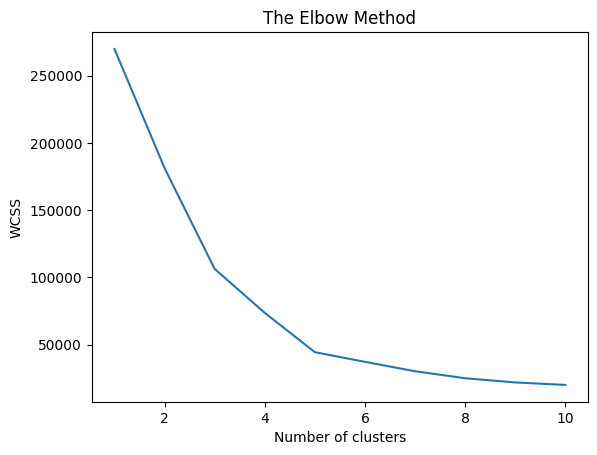

In [20]:
wcss = []
for i in range(1,11):
  model = KMeans(n_clusters=i, init='k-means++',random_state=42)
  model.fit(X)
  wcss.append(model.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- We can choose k value as 5 or 6.

In [23]:
model = KMeans(n_clusters=5, init='k-means++',random_state=42)
y_kmeans = model.fit_predict(X)

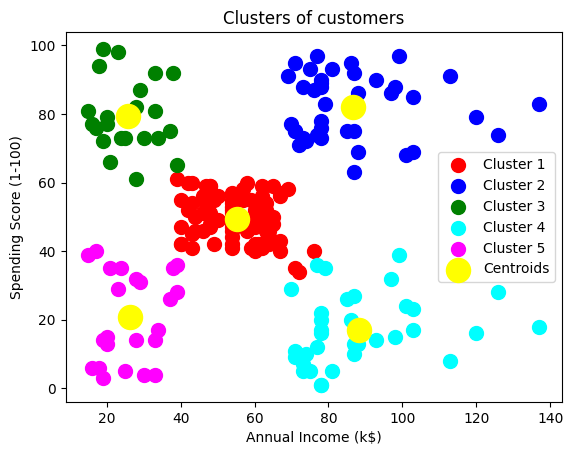

In [24]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans==0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans==1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans==2,1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans==3,1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans==4,1], s=100, c='magenta', label='Cluster 5')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

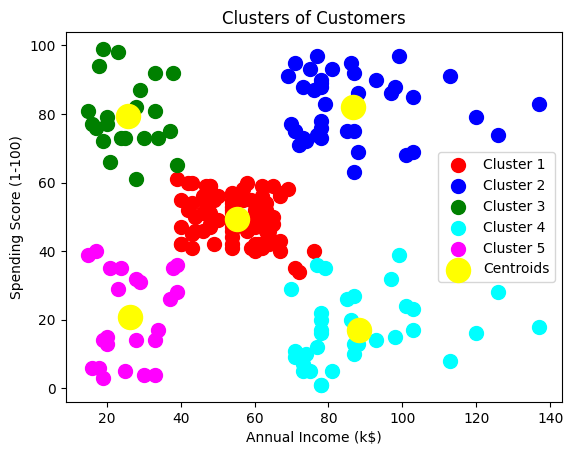

In [25]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans==1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans==2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### **An Advanced Visualization**

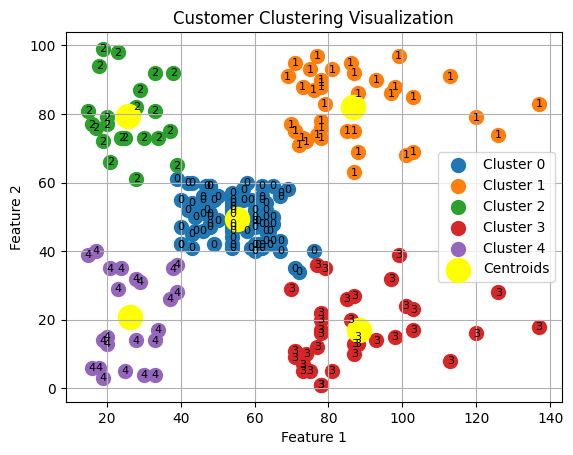

In [26]:
import matplotlib.pyplot as plt

# Assuming X is your data and y_kmeans contains the cluster labels

# Scatter plot for each cluster
for i in range(5):  # Adjust according to the number of clusters
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=100, label=f'Cluster {i}')

# Annotate each point with its cluster number
for i in range(len(X)):
    plt.text(X[i, 0], X[i, 1], str(y_kmeans[i]), fontsize=8, ha='center', va='center')

# Centroids
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

# Labels and title
plt.title('Customer Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()